<div class="alert alert-block alert-success">
    
    
# <center> Project - Phase 3 </center>
## <center> Descriptive Statistics </center>
### <center> Exploratory Data Analysis</center>


<br>
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Load and inspect Transactions.csv dataset
- Execute descriptive analytics tasks for Orders distribution for products sold in different Zip Codes


<br>
    
</div>

In [2]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px



In [3]:
import numpy
print(numpy.__version__)

1.19.0




<div class="alert alert-info">

  
    
## Load and Preprocess the data
- Count how many total deliveries
- Count how many deliveries per Zip Code
- Total number of Orders 
- Total number of Orders per Zip Code
- Total Number of Products ordered per Zip Code
- Total Number of Orders for every Product in every Zip Code per Month

</div>
    
    
    


In [4]:
df = pd.read_csv('Transactions.csv')
df = df.dropna()
df['Delivery_Zip_Code'] = df['Delivery_Zip_Code'].astype(int)
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
0  566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3  254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4  563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4  a9d66460-a48f-419f-8d39-7818290a3041               Actor   

   Credit_Card_Number  Order_ID  Order_Date Expected_Delivery_Date  ...  \
0         12345789032        98    4/7/2020              4/11/2020  ...   
1         12345789032       131   5/10/2020              5/14/2020  ...   
2         12345789032       318  11/13/2020             11/17/2020  ...   
3         12345789032       528   2/12/2020              2/16/2020  ...   
4         12345789032       561   2/12/2020              2/16/2020  ...   

   Product_Name Category  Manufacturer Review_Rating Delivery_Tracking_ID  \
0  Fitbit small  fitness  Fitbit small             3                   98   
1  Fitbit small  fitness  Fitbit small             3                  131   
2  Fitbit small  fitness  Fitbit small             3                  318   
3  Fitbit large  fitness  Fitbit large             5                  528   
4  Fitbit large  fitness  Fitbit large             5                  561   

   Delivery_Type  Delivery_Zip_Code Transaction_Status  Order_Returned  \
0         Pickup              10048           Disputed               1   
1         Pickup              10048           Disputed               1   
2         Pickup              10048           Disputed               1   
3         Pickup              10048           Disputed               0   
4         Pickup              10048           Disputed               0   

  Order_Delivered_on_Time  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 22 columns]

In [5]:
df['Order_ID'].count()

16372

In [6]:
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df.set_index('Actual_Delivery_Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

/tmp/ipykernel_3069/2024384398.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = df.index.weekofyear


In [7]:
df.dtypes

CustomerID                         object
FirstName                          object
LastName                           object
CreditCardNumber                   object
OrderID                            object
Customer_Occupation                object
Credit_Card_Number                  int64
Order_ID                            int64
Order_Date                 datetime64[ns]
Expected_Delivery_Date     datetime64[ns]
Product_ID                         object
Product_Name                       object
Category                           object
Manufacturer                       object
Review_Rating                       int64
Delivery_Tracking_ID                int64
Delivery_Type                      object
Delivery_Zip_Code                   int64
Transaction_Status                 object
Order_Returned                      int64
Order_Delivered_on_Time             int64
year                                int64
month                               int64
day                               

In [40]:
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
Actual_Delivery_Date                                                         
2020-04-15            566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
2020-05-18            274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2020-11-21            455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
2020-02-20            254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
2020-02-20            563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                                   OrderID  \
Actual_Delivery_Date                                         
2020-04-15            50787284-d78d-4b6a-b93f-7419b0d46590   
2020-05-18            f61639d7-28de-4507-a63a-71e99921d8f9   
2020-11-21            7b1caf69-bd5b-441c-9115-6fa31ba1c313   
2020-02-20            cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5   
2020-02-20            a9d66460-a48f-419f-8d39-7818290a3041   

                     Customer_Occupation  Credit_Card_Number  Order_ID  \
Actual_Delivery_Date                                                     
2020-04-15                        Lawyer         12345789032        98   
2020-05-18                        Lawyer         12345789032       131   
2020-11-21                        Lawyer         12345789032       318   
2020-02-20                         Actor         12345789032       528   
2020-02-20                         Actor         12345789032       561   

                     Order_Date Expected_Delivery_Date  ...  \
Actual_Delivery_Date                                    ...   
2020-04-15           2020-04-07             2020-04-11  ...   
2020-05-18           2020-05-10             2020-05-14  ...   
2020-11-21           2020-11-13             2020-11-17  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
2020-02-20           2020-02-12             2020-02-16  ...   

                     Delivery_Tracking_ID Delivery_Type Delivery_Zip_Code  \
Actual_Delivery_Date                                                        
2020-04-15                             98        Pickup             10048   
2020-05-18                            131        Pickup             10048   
2020-11-21                            318        Pickup             10048   
2020-02-20                            528        Pickup             10048   
2020-02-20                            561        Pickup             10048   

                     Transaction_Status  Order_Returned  \
Actual_Delivery_Date                                      
2020-04-15                     Disputed               1   
2020-05-18                     Disputed               1   
2020-11-21                     Disputed               1   
2020-02-20                     Disputed               0   
2020-02-20                     Disputed               0   

                      Order_Delivered_on_Time  year  month day  week_of_year  
Actual_Delivery_Date                                                          
2020-04-15                                  1  2020      4  15            16  
2020-05-18                                  1  2020      5  18            21  
2020-11-21                                  1  2020     11  21            47  
2020-02-20                                  1  2020      2  20             8  
2020-02-20                                  1  2020      2  20             8  

[5 rows x 25 columns]





<div class="alert alert-info">

  
    
## Descriptive Analytics


</div>
    

In [9]:
df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product')

Product_Name  Total_orders_per_product
0           Bose                       910
1   Fitbit large                      2903
2   Fitbit small                      2904
3  Harman Kardon                      1445
4            JBL                       910
5       Logitech                      1525
6          Redmi                       910
7    Samsung s10                       910
8           Sony                      2435
9            VR7                      1520

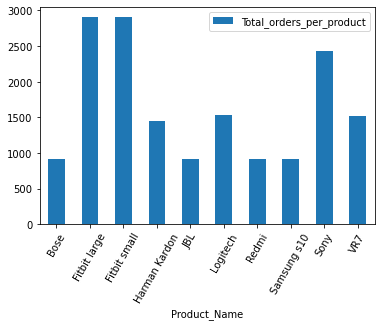

In [10]:
ax = df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product').plot.bar(x='Product_Name', y='Total_orders_per_product', rot=60)





<div class="alert alert-info">

  
    
## Deliveries/Orders per  Zip Code Distribution


</div>
    


In [11]:
df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zipcode')

Delivery_Zip_Code  Total_orders_per_zipcode
0               10048                       413
1               10110                       394
2               10121                       391
3               10123                       439
4               10168                       416
..                ...                       ...
57              90076                       369
58              90077                       292
59              90080                       301
60              90097                       395
61              90774                       388

[62 rows x 2 columns]

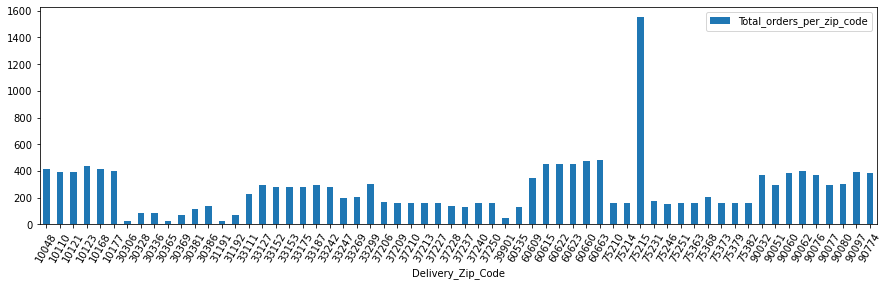

In [12]:
ax1 = df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zip_code').plot.bar(x='Delivery_Zip_Code', y='Total_orders_per_zip_code', rot=60, figsize=(15, 4))


In [13]:
Categories = df['Category'].unique()
Categories

array(['fitness', 'phone', 'speaker', 'tv', 'vr'], dtype=object)

In [14]:
Zips = df['Delivery_Zip_Code'].unique()
Zips

array([10048, 10110, 10121, 10123, 10168, 10177, 30306, 30328, 30336,
       30365, 30369, 30381, 30386, 31191, 31192, 33111, 33127, 33152,
       33153, 33175, 33187, 33242, 33247, 33269, 33299, 37206, 37209,
       37210, 37213, 37227, 37228, 37237, 37240, 37250, 39901, 60609,
       60535, 60615, 60622, 60623, 60660, 60663, 75210, 75214, 75215,
       75231, 75246, 75251, 75363, 75368, 75373, 75379, 75382, 90032,
       90051, 90060, 90062, 90076, 90077, 90080, 90097, 90774])

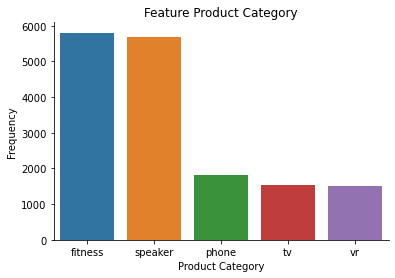

In [15]:
sort_X1 = df.groupby('Category').size()\
                    .sort_values(ascending=False)\
                    .index
#plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order = sort_X1)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Feature Product Category')
sns.despine();

In [16]:
df_bx = pd.DataFrame({'count' : df.groupby( [ "Category", "Delivery_Zip_Code"] ).size()}).reset_index()


df_bx[1:303]

Category  Delivery_Zip_Code  count
1    fitness              10110    139
2    fitness              10121    137
3    fitness              10123    154
4    fitness              10168    147
5    fitness              10177    148
..       ...                ...    ...
298       vr              90060     38
299       vr              90062     41
300       vr              90076     40
301       vr              90077     27
302       vr              90080     23

[302 rows x 3 columns]

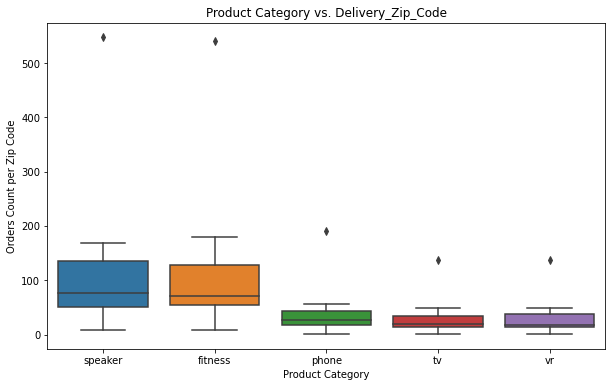

In [17]:
sort_y = df_bx.groupby('Category')['count']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))

sns.boxplot(y='count', x='Category', data=df_bx, order=sort_y)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Category')
plt.ylabel('Orders Count per Zip Code')
plt.title('Product Category vs. Delivery_Zip_Code')
plt.show();



<div class="alert alert-info">

  
    
## Time Series Forecasting

- Calculate Total number of orders per Date


</div>



In [18]:
slice_for_zip_code = df.loc[df['Delivery_Zip_Code'] == 60535]

In [19]:
df_deliveries_count = slice_for_zip_code.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_count

Expected_Delivery_Date  Total_Number_of_orders
0               2018-01-10                       1
1               2018-01-16                       1
2               2018-01-18                       2
3               2018-01-31                       1
4               2018-02-05                       1
..                     ...                     ...
107             2020-11-11                       1
108             2020-11-18                       1
109             2020-11-26                       1
110             2020-11-29                       1
111             2020-12-19                       1

[112 rows x 2 columns]


<div class="alert alert-info">

  
    
## Distribution of Products Bought in Zip Codes

- Create 6-months bins


</div>






In [20]:
bins_dt = pd.date_range('2018-01-01', freq='6MS', periods=8)
bins_str = bins_dt.astype(str).values

labels = ['(2018-01-01, 2018-06-31)',
          '(2018-07-01, 2018-12-31)',
          '(2019-01-01, 2019-06-31)',
          '(2019-07-01, 2019-12-31)',
          '(2020-01-01, 2020-06-31)',
          '(2020-07-01, 2020-12-31)',
          '(2021-01-01, 2021-06-31)']
df_6_months_bins = df.groupby(['Expected_Delivery_Date'
                   ,'Product_Name'
                   ,'Delivery_Zip_Code'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')

df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

/tmp/ipykernel_3069/4021466242.py:15: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
/tmp/ipykernel_3069/4021466242.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  bins=bins_dt.astype(np.int64)//10**9,


In [21]:
df_6_months_bins

Expected_Delivery_Date Product_Name  Delivery_Zip_Code  \
0                 2018-01-05     Logitech              33242   
1                 2018-01-05     Logitech              60622   
2                 2018-01-05     Logitech              75215   
3                 2018-01-05     Logitech              90062   
4                 2018-01-05        Redmi              37210   
...                      ...          ...                ...   
12102             2021-01-04  Samsung s10              10123   
12103             2021-01-04  Samsung s10              33127   
12104             2021-01-04  Samsung s10              75210   
12105             2021-01-04  Samsung s10              75214   
12106             2021-01-04  Samsung s10              75215   

       Total_Number_of_orders                      bins  
0                           2  (2018-01-01, 2018-06-31)  
1                           1  (2018-01-01, 2018-06-31)  
2                           1  (2018-01-01, 2018-06-31)  
3                           1  (2018-01-01, 2018-06-31)  
4                           1  (2018-01-01, 2018-06-31)  
...                       ...                       ...  
12102                       1  (2021-01-01, 2021-06-31)  
12103                       1  (2021-01-01, 2021-06-31)  
12104                       1  (2021-01-01, 2021-06-31)  
12105                       1  (2021-01-01, 2021-06-31)  
12106                       1  (2021-01-01, 2021-06-31)  

[12107 rows x 5 columns]

In [24]:
grouped_bin_df = df_6_months_bins.groupby(['bins','Product_Name','Delivery_Zip_Code'])['Total_Number_of_orders'].sum().reset_index(name ='Total_Number_of_orders')
grouped_bin_df['Total_Number_of_orders'] = grouped_bin_df['Total_Number_of_orders'].fillna(0)
grouped_bin_df.head(10)

bins Product_Name  Delivery_Zip_Code  \
0  (2018-01-01, 2018-06-31)         Bose              10048   
1  (2018-01-01, 2018-06-31)         Bose              10110   
2  (2018-01-01, 2018-06-31)         Bose              10121   
3  (2018-01-01, 2018-06-31)         Bose              10123   
4  (2018-01-01, 2018-06-31)         Bose              10168   
5  (2018-01-01, 2018-06-31)         Bose              10177   
6  (2018-01-01, 2018-06-31)         Bose              30306   
7  (2018-01-01, 2018-06-31)         Bose              30328   
8  (2018-01-01, 2018-06-31)         Bose              30336   
9  (2018-01-01, 2018-06-31)         Bose              30365   

   Total_Number_of_orders  
0                       2  
1                       2  
2                       1  
3                       2  
4                       4  
5                       0  
6                       0  
7                       0  
8                       2  
9                       0


<div class="alert alert-info">

  
    
## Lets filter total orders for specific list of Zip Codes

- List of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]


</div>


In [25]:
zip_codes = [60623, 60663, 60609, 60660, 60615, 60622]
grouped_bin_df = grouped_bin_df[grouped_bin_df.Delivery_Zip_Code.isin(zip_codes)]
grouped_bin_df

bins Product_Name  Delivery_Zip_Code  \
36    (2018-01-01, 2018-06-31)         Bose              60609   
37    (2018-01-01, 2018-06-31)         Bose              60615   
38    (2018-01-01, 2018-06-31)         Bose              60622   
39    (2018-01-01, 2018-06-31)         Bose              60623   
40    (2018-01-01, 2018-06-31)         Bose              60660   
...                        ...          ...                ...   
4315  (2021-01-01, 2021-06-31)          VR7              60615   
4316  (2021-01-01, 2021-06-31)          VR7              60622   
4317  (2021-01-01, 2021-06-31)          VR7              60623   
4318  (2021-01-01, 2021-06-31)          VR7              60660   
4319  (2021-01-01, 2021-06-31)          VR7              60663   

      Total_Number_of_orders  
36                         6  
37                         2  
38                         8  
39                         3  
40                         7  
...                      ...  
4315                       0  
4316                       0  
4317                       0  
4318                       0  
4319                       0  

[420 rows x 4 columns]

/tmp/ipykernel_3069/2545144156.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])


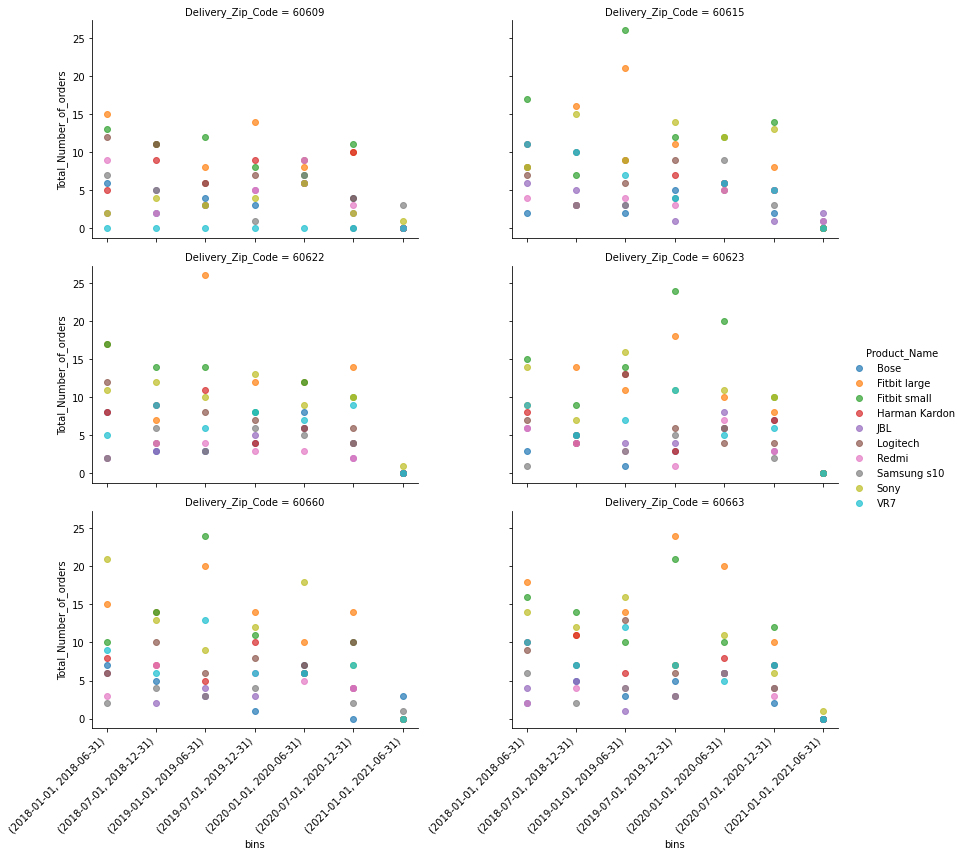

In [26]:
g = sns.FacetGrid(grouped_bin_df, col="Delivery_Zip_Code", hue="Product_Name", margin_titles=True, col_wrap=2, height=4, aspect=1.5)
g.map(plt.scatter, 'bins', 'Total_Number_of_orders', alpha=.7)
ha = ['right', 'center', 'left']
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])
plt.tight_layout(h_pad=1)
g.add_legend();





<div class="alert alert-info">

  
    
## Total number of Orders per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


In [27]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

month  Delivery_Zip_Code  Total_Number_of_orders_per_month
36       1              60609                                45
37       1              60615                                59
38       1              60622                                54
39       1              60623                                68
40       1              60660                                66
..     ...                ...                               ...
714     12              60615                                39
715     12              60622                                36
716     12              60623                                32
717     12              60660                                41
718     12              60663                                40

[72 rows x 3 columns]

In [28]:
monthly_df_products = df.groupby(['month',
                         'Product_Name',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df_products = monthly_df_products[monthly_df_products.Delivery_Zip_Code.isin(zip_codes)]
monthly_df_products

month Product_Name  Delivery_Zip_Code  Total_Number_of_orders_per_month
21        1         Bose              60609                                 4
22        1         Bose              60615                                 4
23        1         Bose              60622                                 4
24        1         Bose              60623                                 2
25        1         Bose              60660                                 6
...     ...          ...                ...                               ...
4973     12          VR7              60615                                 2
4974     12          VR7              60622                                 4
4975     12          VR7              60623                                 4
4976     12          VR7              60660                                 2
4977     12          VR7              60663                                 5

[639 rows x 4 columns]




<div class="alert alert-info">

  
    
## Total number of Orders  per Zip Code per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


/home/jhancuch/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


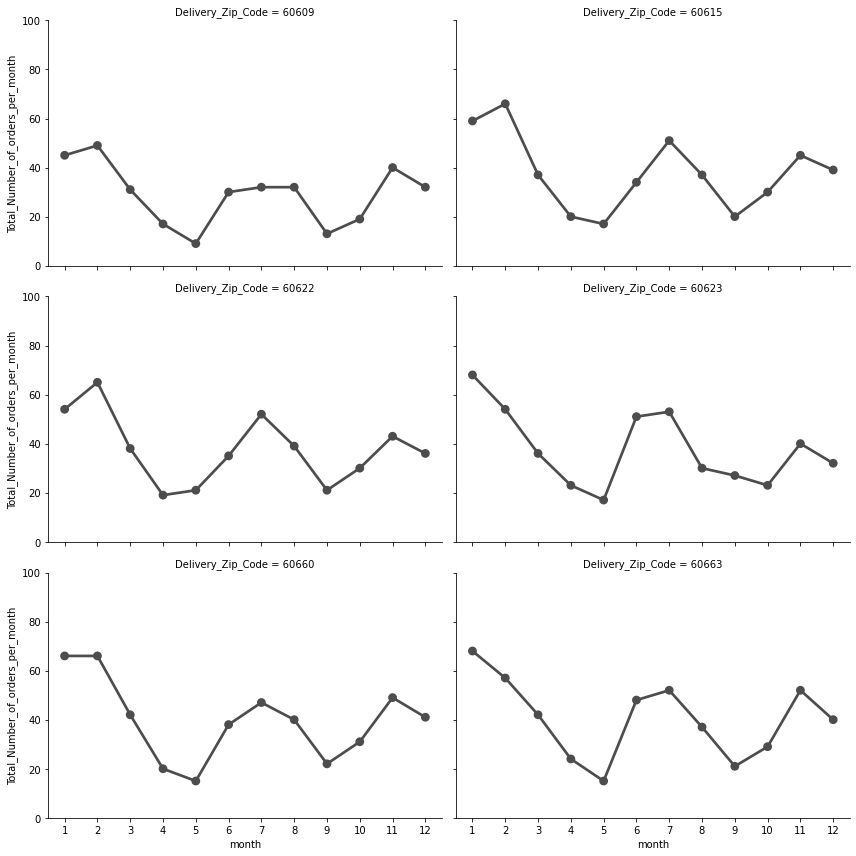

In [29]:
g = sns.FacetGrid(monthly_df, col="Delivery_Zip_Code", col_wrap=2,  ylim=(0, 100), height=4, aspect=1.5)
g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", color=".3", ci=None);





<div class="alert alert-info">

  
    
## Total Number of Orders per Product per Zip Code per Month:
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]





</div>

/home/jhancuch/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


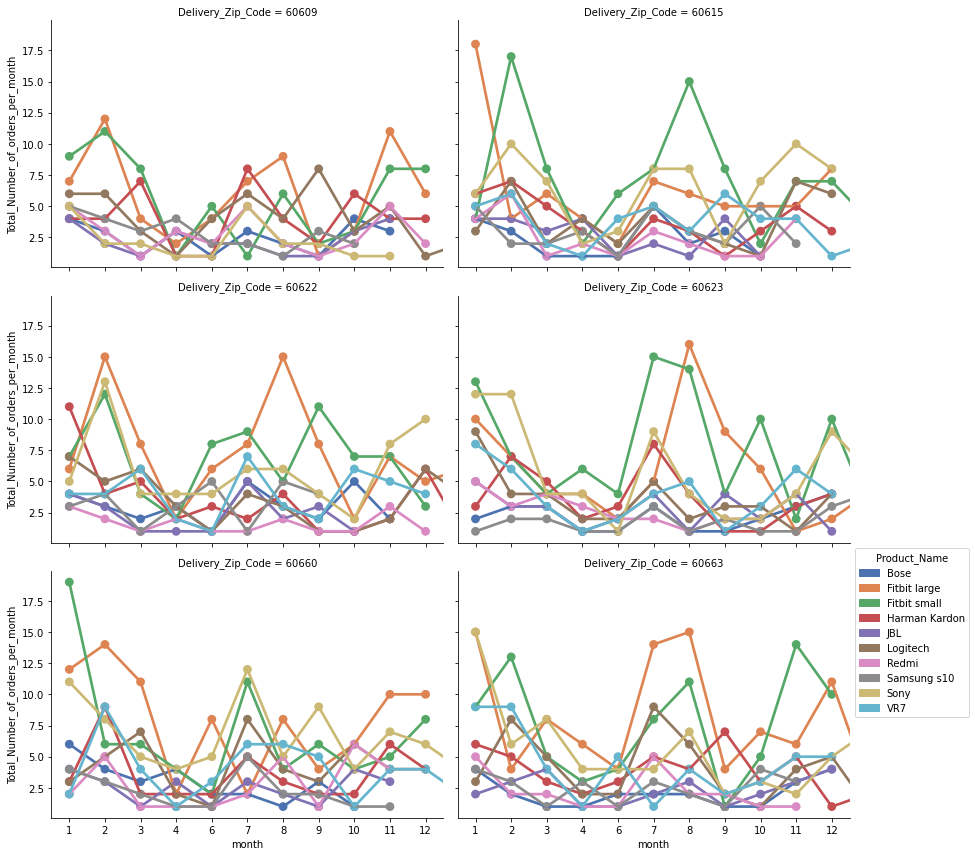

In [30]:
from matplotlib import patches
g = sns.FacetGrid(monthly_df_products, col="Delivery_Zip_Code", 
                  hue="Product_Name",
                  margin_titles=True, 
                  col_wrap=2, palette="deep", 
                  height=4, aspect=1.5)

g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", ci=None)  # 
labels = ["Bose","Fitbit large","Fitbit small","Harman Kardon","JBL","Logitech","Redmi","Samsung s10","Sony","VR7"] #hue_order
colors = sns.color_palette("deep").as_hex()[:len(labels)]
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,labels)]
plt.legend(handles=handles,title='Product_Name',loc='center left',bbox_to_anchor=(1,0.75));

In [32]:
fig = px.line(df_deliveries_count, x='Expected_Delivery_Date', y='Total_Number_of_orders')
fig.update_layout(title_text='Time Series of daily order counts for all users for zip code: 60535')
fig.show()



<div class="alert alert-success">

# Project Phase 3 
    
## Requirements

    

</div>

<div class="alert alert-info">   
    
## Requirement #3
### Forecast the number of returned orders for every warehouse
    - Consider calculating only the simple average to forecast per day, week, month for every warehouse
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [33]:
df_req_3 = df[df['Order_Returned'] == 1]
df_req_3.reset_index(inplace=True)

In [46]:
df_req_3.head()

Actual_Delivery_Date   CustomerID FirstName LastName     CreditCardNumber  \
0           2020-04-15  566-26-0321    Rebeka   Stokes  xxxx-xxxx-xxxx-2650   
1           2020-05-18  274-18-0017   Rahsaan     Koch  xxxx-xxxx-xxxx-5055   
2           2020-11-21  455-28-7950      Zion  Osinski  xxxx-xxxx-xxxx-0150   
3           2021-01-03  848-43-9454    Kaylie    Welch  xxxx-xxxx-xxxx-3090   
4           2019-11-20  404-86-6657    Justus      Kub  xxxx-xxxx-xxxx-8855   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  67e391c0-121b-42fc-8810-169406cc0b6d              Lawyer   
4  04e47197-02bc-4e6a-ade8-ec6f7130cd56              Lawyer   

   Credit_Card_Number  Order_ID Order_Date  ... Delivery_Tracking_ID  \
0         12345789032        98 2020-04-07  ...                   98   
1         12345789032       131 2020-05-10  ...                  131   
2         12345789032       318 2020-11-13  ...                  318   
3         12345789032       902 2020-12-26  ...                  902   
4         12345789032      1223 2019-11-12  ...                 1223   

  Delivery_Type Delivery_Zip_Code Transaction_Status Order_Returned  \
0        Pickup             10048           Disputed              1   
1        Pickup             10048           Disputed              1   
2        Pickup             10048           Disputed              1   
3        Pickup             10048           Disputed              1   
4        Pickup             10048           Disputed              1   

   Order_Delivered_on_Time  year month  day week_of_year  
0                        1  2020     4   15           16  
1                        1  2020     5   18           21  
2                        1  2020    11   21           47  
3                        1  2021     1    3           53  
4                        1  2019    11   20           47  

[5 rows x 26 columns]

### Forecast per day

In [49]:
df_req_3_day = df_req_3.groupby('Actual_Delivery_Date', 'Delivery_Zip_Code').count()

#df.groupby('A')['B'].mean()

ValueError: No axis named Delivery_Zip_Code for object type DataFrame

### Forecast per week

### Forecast per month

In [ ]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

<div class="alert alert-info">   
    
## Requirement #4
### Forecast the number of delayed deliveries for every zip code
    - Consider calculating only the simple average to forecast per day, week, month for every zip code
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [78]:
# ADD YOUR CODE HERE


<div class="alert alert-info">   
    
## Requirement #5
### Forecast the number of delayed deliveries for every distribution
center
    - Consider calculating only the simple average to forecast per day, week, month for every zip code
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [79]:
# ADD YOUR CODE HERE


<div class="alert alert-info">   
    
## Requirement #6
### Identify top 10 distribution centers with highest number of order returns

    
</div>

In [80]:
# ADD YOUR CODE HERE


<div class="alert alert-info">   
    
## Requirement #7
### Identify top 10 distribution centers with lowest number of order returns

    
</div>

In [81]:
# ADD YOUR CODE HERE


<div class="alert alert-info">   
    
## Requirement #8
### Identify top 10 distribution centers with lowest number of deliveries

    
</div>

In [82]:
# ADD YOUR CODE HERE


<div class="alert alert-info">   
    
## Requirement #9
### To offload busiest warehouse with highest number of order returns, identify the warehouse that has the forecast for the highest number of order returns, and find its nearest neighboring warehouse that has the lowest number of order returns (consider 50-200 mile radius)
        - After you identify the warehouse with highest returns and the returns for every warehouse
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cyoher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [83]:
# ADD YOUR Python CODE HERE


<div class="alert alert-block alert-warning">
    
## ADD YOUR Neo4j/Cypher CODE and OUTPUT HERE 
- MATCH (Warehouse_4:Warehouse {facility_id: "Warehouse_4"})
- MATCH (Warehouse_5:Warehouse {facility_id: "Warehouse_5"})
- RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))


    
    

</div>


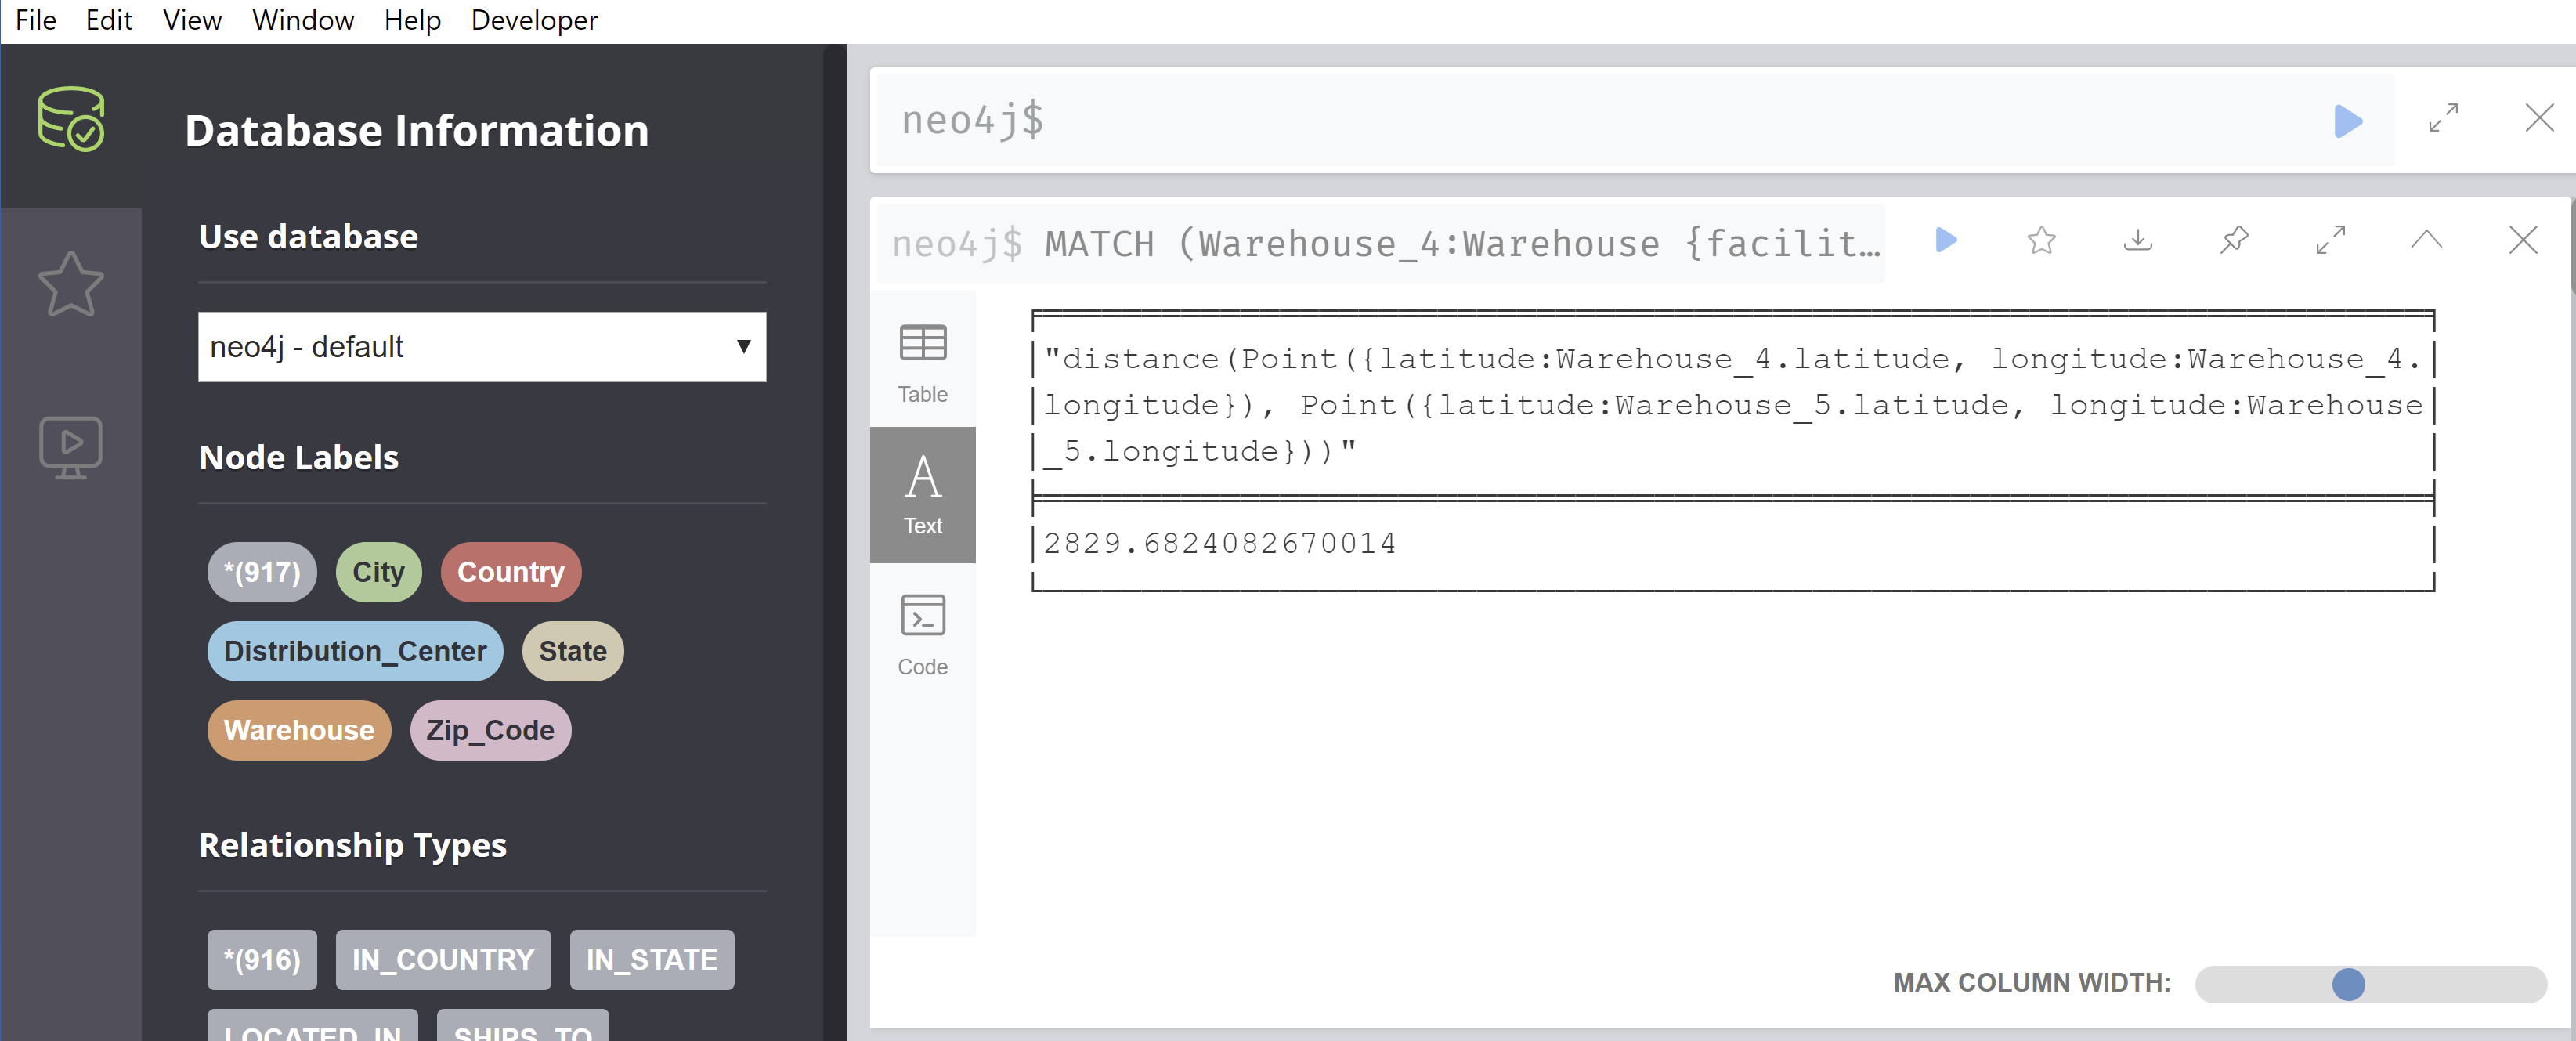


<div class="alert alert-info">   
    
## Requirement #10
### To offload the busiest distribution center with highest number of delayed deliveries, identify the distribution center that has the forecast for the highest number of delayed deliveries, and find its nearest neighboring distribution center that has the lowest number of delayed deliveries (consider 1-20 miles radius)
    
        - After you identify the busiest distribution center with highest number of delayed deliveries and the delayed deliveries for every distribution center
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cypher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [84]:
# ADD YOUR Python CODE HERE


<div class="alert alert-block alert-warning">
    
## ADD YOUR Neo4j/Cypher CODE and OUTPUT HERE 
- MATCH (Warehouse_4:Warehouse {facility_id: "Warehouse_4"})
- MATCH (Warehouse_5:Warehouse {facility_id: "Warehouse_5"})
- RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))


    
    

</div>


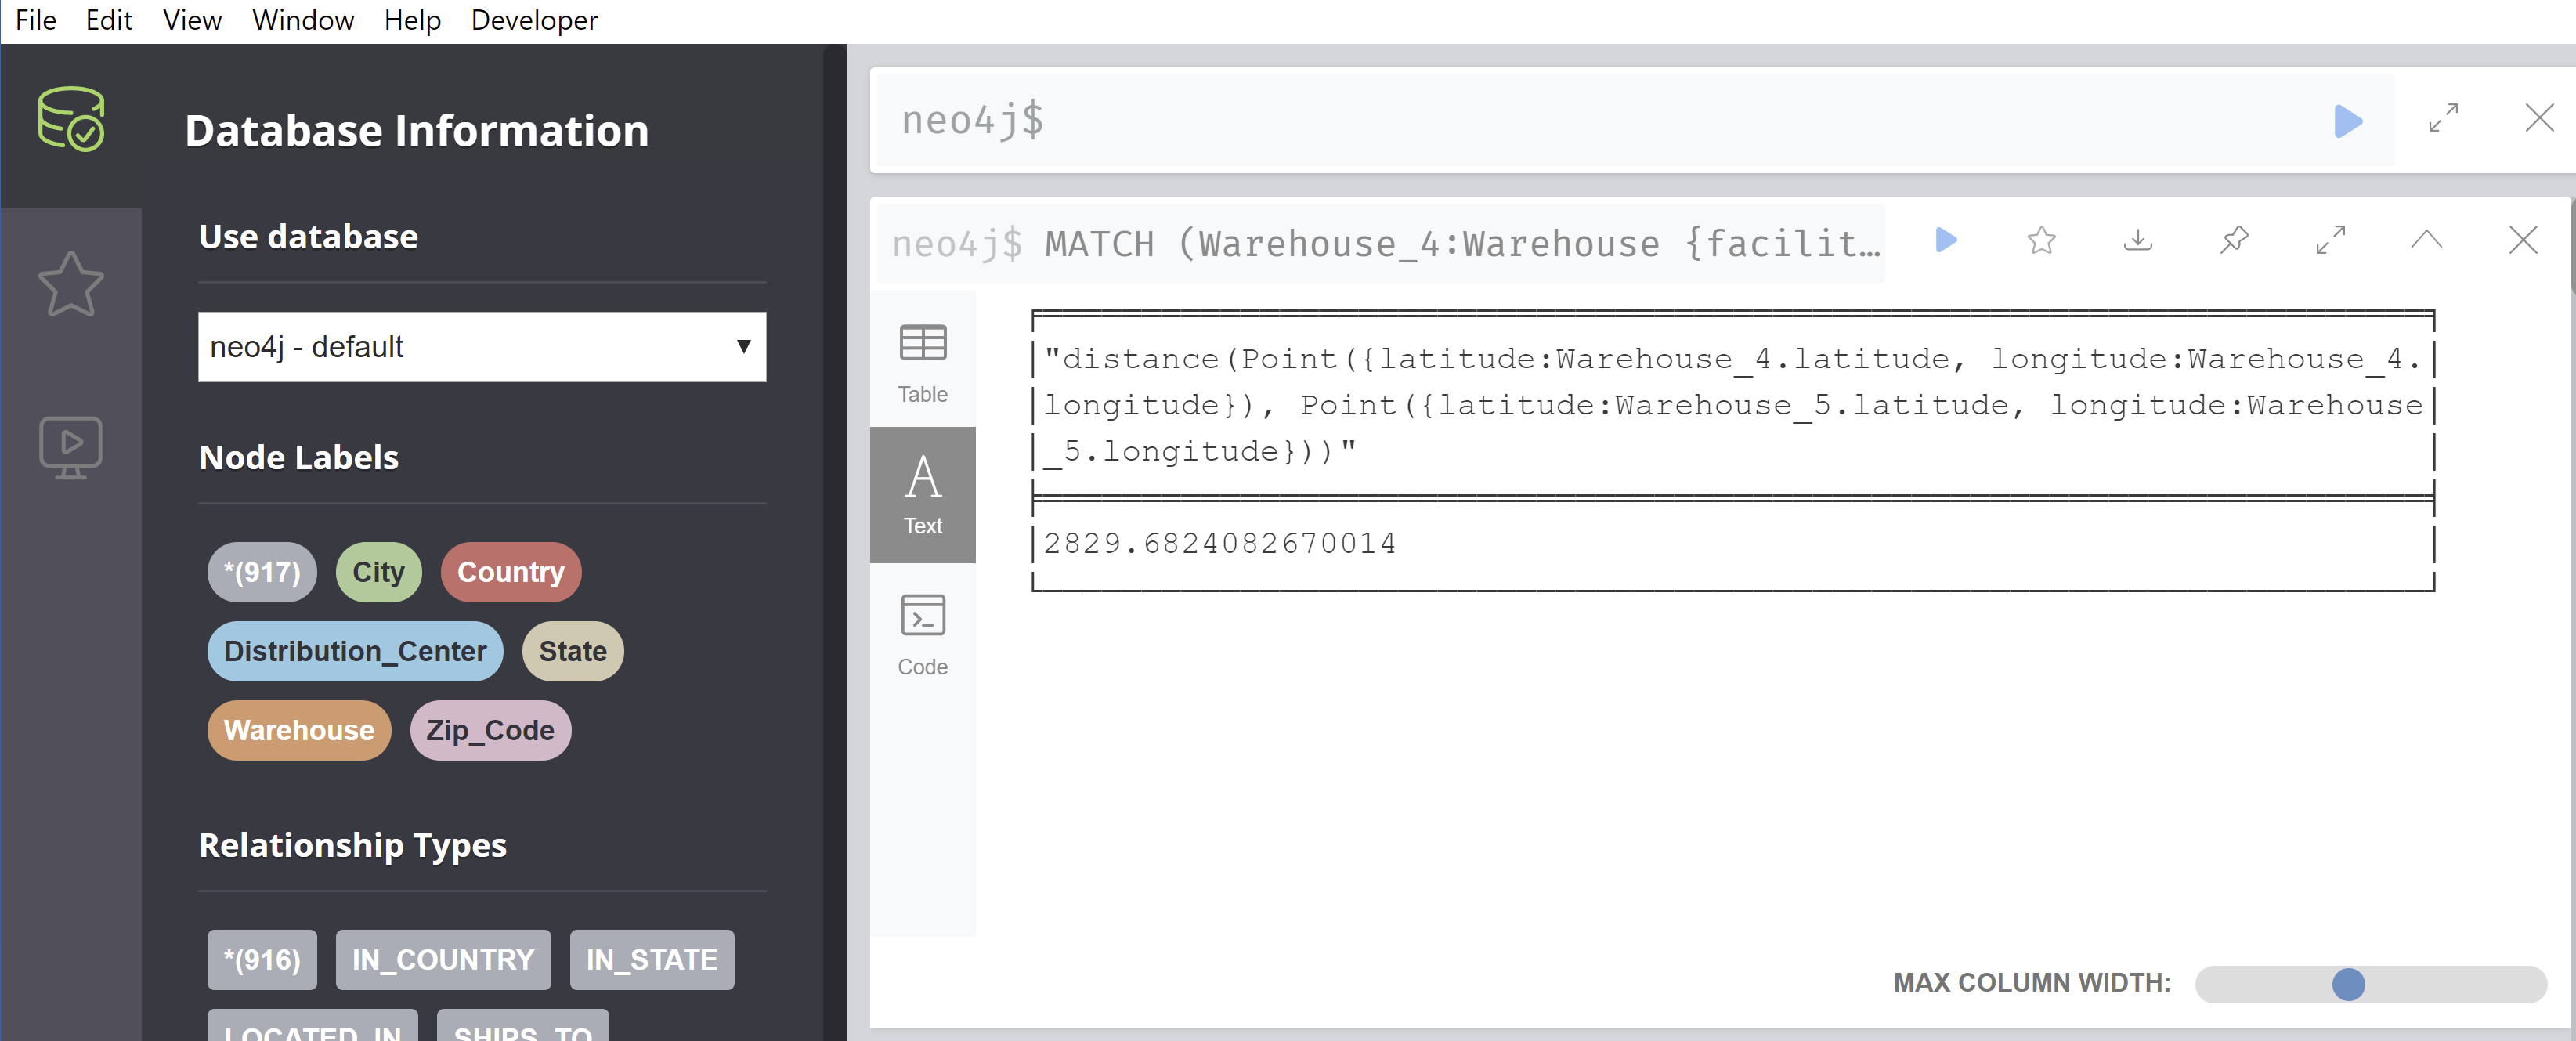
